In [1]:
import os
import pandas as pd
import numpy as np
from sklearn.svm import SVR
import matplotlib
from matplotlib import pyplot as plt
import random
from pandas import DataFrame
from datetime import datetime

#from tensorflow.keras.optimizers import Adam


# input file path
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Dataset//Scenario2_EDC-11K"

In [2]:
# read input file and index file for training and test set
dataset = np.load(workdir + "//200914_EDC11K.npz")
ss0 = np.load(workdir + '//200914_EDC11K_r0_9_1.npz')

In [3]:
# input and index file assign
x = dataset['x']
y = dataset['y']
# y_linear = dataset['y_lnIC50']
ss0_train = ss0['train']
ss0_test = ss0['test']

In [4]:
# training and test dataset assign
training_image_array, training_label_array = x[ss0_train], y[ss0_train]
test_image_array, test_label_array = x[ss0_test], y[ss0_test]


In [5]:
# checking the size of dataset
x.shape

(11360, 21313)

In [6]:
# checking the size of training set
training_image_array.shape

(10224, 21313)

In [7]:
train_X, train_y, test_X, test_y = training_image_array, training_label_array, test_image_array, test_label_array


In [8]:
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)

(10224, 21313) (10224,) (1136, 21313) (1136,)


In [9]:
# impute nan to zero
train_X = np.nan_to_num(train_X)
test_X = np.nan_to_num(test_X)

In [10]:
# data typing and the number of dataset
train_X = train_X.astype('float32')
test_X = test_X.astype('float32')
# train_X /= 255
# test_X /= 255
print('train_X shape:', train_X.shape)
print(train_X.shape[0], 'train samples')
print(test_X.shape[0], 'test samples')

train_X shape: (10224, 21313)
10224 train samples
1136 test samples


In [11]:
# model fitting
StartTime8 = datetime.now()
print("StartTime :", StartTime8)
svr_lin = SVR(C=0.01)
predicted_value = svr_lin.fit(train_X, train_y).predict(test_X)
EndTime8 = datetime.now()
print("EndTime :", EndTime8)

StartTime : 2020-09-15 11:28:16.632140
EndTime : 2020-09-15 12:07:14.891959


In [12]:
# saving predicted ln(IC50)s and ln(IC50)s in the test set
a = pd.DataFrame(predicted_value)
b = pd.DataFrame(test_label_array)
c = pd.concat([a,b], axis=1)
c.columns=["Predicted","Test"]
workdir = "D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EDC-11K"
c.to_csv(workdir + '//200915_EDC11K_SVR_pred_and_val_result.csv', index=False)


In [13]:
# result table
c.head()

,Predicted,Test
0,1.971361,2.079442
1,1.893799,-3.022156
2,1.961765,2.079442
3,1.980641,2.079442
4,1.973047,2.079442


In [14]:
# the length of result table
predicted_value.shape

(1136,)

In [15]:
# model save
import pickle
from sklearn.externals import joblib
joblib.dump(svr_lin, workdir + '//200915_EDC11K_SVR_model.pkl') 


C:\Users\ylab\AppData\Local\conda\conda\envs\ronny\lib\site-packages\sklearn\externals\joblib\__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)


['D://DrugResponsivenessGuideline_log//Github//200914_reupload//Result//EDC-11K//200915_EDC11K_SVR_model.pkl']

In [16]:
# check whether the saved model is working
regr_from_joblib = joblib.load(workdir + '//200915_EDC11K_SVR_model.pkl') 
regr_from_joblib.predict(test_X)

array([1.97136102, 1.89379922, 1.96176491, ..., 1.96809654, 1.97653126,
       1.93939041])

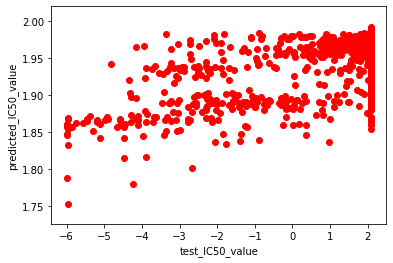

In [17]:
# plotting
plt.scatter(test_label_array,predicted_value,c='red')
plt.xlabel('test_IC50_value')
plt.ylabel('predicted_IC50_value')
plt.savefig(workdir + '//200915_EDC11K_SVR_plot.png')

In [18]:
# R-squared value
from sklearn.metrics import r2_score
r2_value = r2_score(b,a)
print(r2_value)

-0.2571893501887652


In [19]:
# Linear regression value (slope)
from scipy.stats import linregress
linregress(b[0], a[0])

LinregressResult(slope=0.01393201361923883, intercept=1.9366444415173654, rvalue=0.7039855427065377, pvalue=1.0050354633578285e-170, stderr=0.0004173813474005349)

In [20]:
# RMSE
rse = ((b[0]-a[0])**2).sum()
mse = rse / len(b)
print("Final rmse value is =",np.sqrt(mse))

Final rmse value is = 2.248117570521147
